## **Handling Missing Values – Ames Housing Dataset (Regression)**


In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
data_path = "/content/drive/MyDrive/0.Latest_DS_Course/Projects/EDA/AmesHousing.csv"


### **1. Setup**

In [3]:


import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.impute import KNNImputer
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer


In [4]:

# Create folder for processed data
os.makedirs("processed", exist_ok=True)

# Load dataset
df = pd.read_csv(data_path)

In [5]:
df.shape

(2930, 82)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2930 entries, 0 to 2929
Data columns (total 82 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Order            2930 non-null   int64  
 1   PID              2930 non-null   int64  
 2   MS SubClass      2930 non-null   int64  
 3   MS Zoning        2930 non-null   object 
 4   Lot Frontage     2440 non-null   float64
 5   Lot Area         2930 non-null   int64  
 6   Street           2930 non-null   object 
 7   Alley            198 non-null    object 
 8   Lot Shape        2930 non-null   object 
 9   Land Contour     2930 non-null   object 
 10  Utilities        2930 non-null   object 
 11  Lot Config       2930 non-null   object 
 12  Land Slope       2930 non-null   object 
 13  Neighborhood     2930 non-null   object 
 14  Condition 1      2930 non-null   object 
 15  Condition 2      2930 non-null   object 
 16  Bldg Type        2930 non-null   object 
 17  House Style   


### **2. Missingness Exploration**


,Missing Count,Missing %
Pool QC,2917,99.556314
Misc Feature,2824,96.382253
Alley,2732,93.242321
Fence,2358,80.477816
Mas Vnr Type,1775,60.580205
Fireplace Qu,1422,48.532423
Lot Frontage,490,16.723549
Garage Qual,159,5.426621
Garage Cond,159,5.426621
Garage Yr Blt,159,5.426621


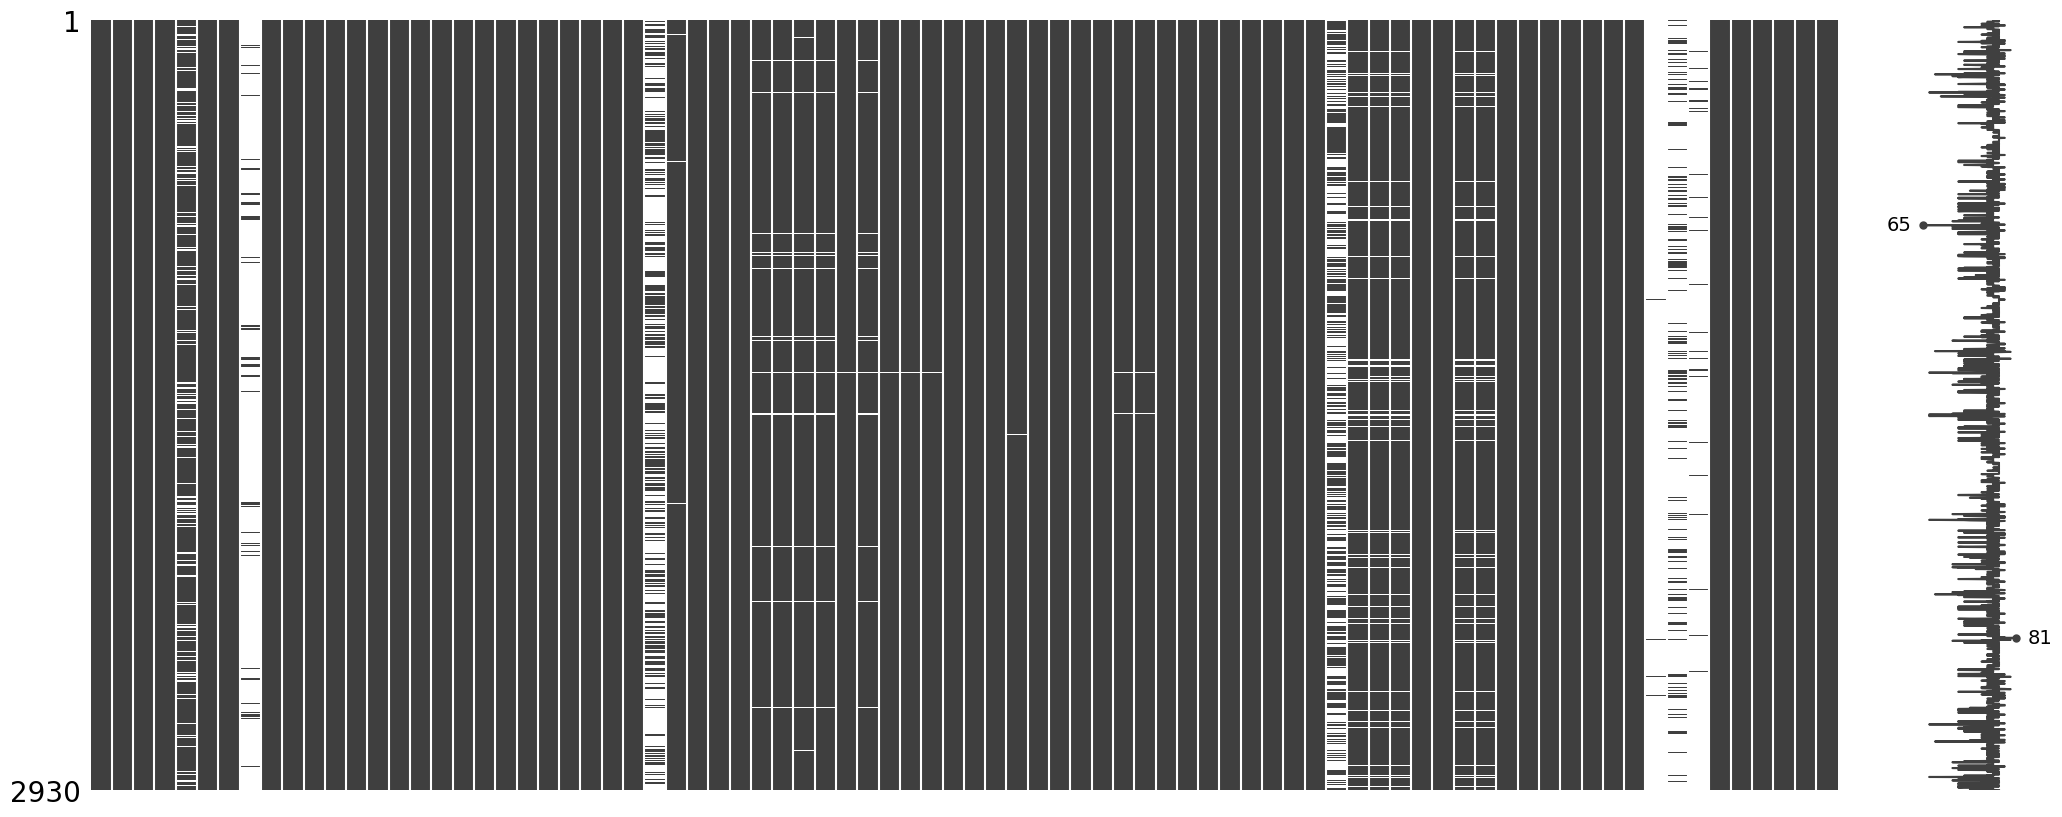

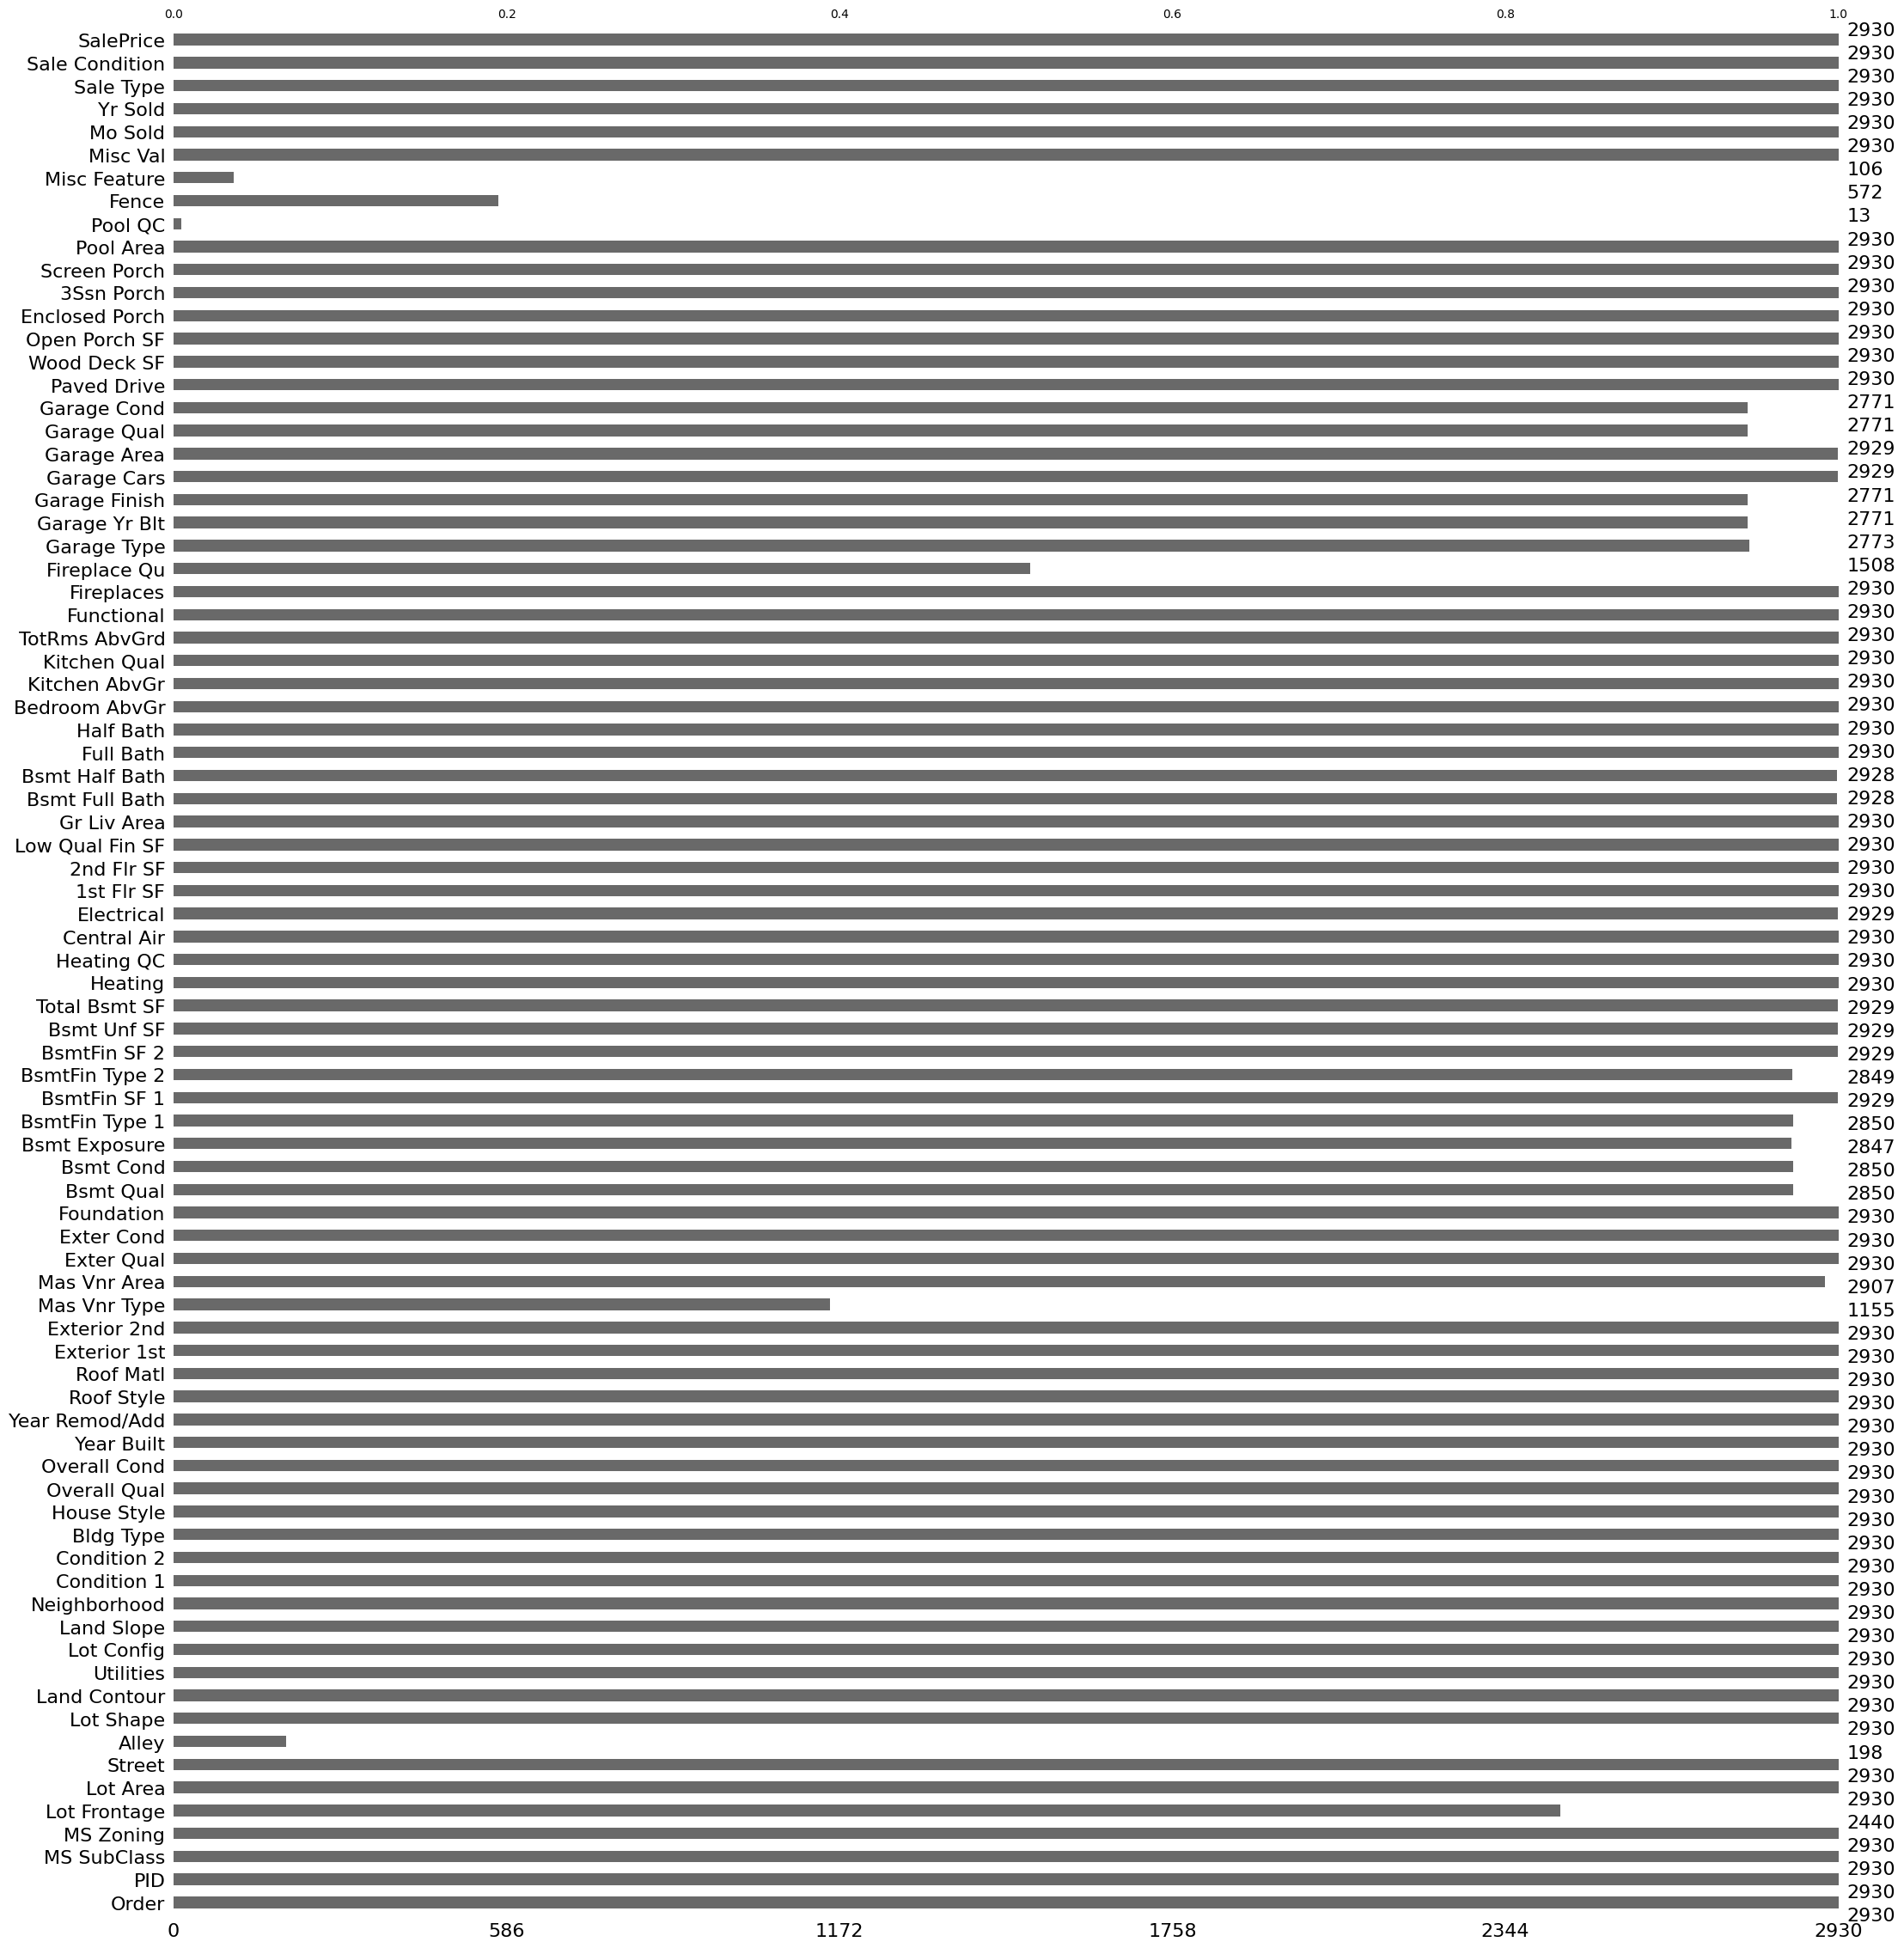

In [7]:

# Counts and percentages
missing_counts = df.isna().sum()
missing_perc = (missing_counts / len(df)) * 100
missing_summary = pd.DataFrame({"Missing Count": missing_counts, "Missing %": missing_perc})
missing_summary = missing_summary[missing_summary["Missing Count"] > 0].sort_values("Missing %", ascending=False)

display(missing_summary)

# Visuals
msno.matrix(df)
plt.show()

msno.bar(df)
plt.show()

In [8]:
missing_summary.shape

(27, 2)


### **3. Techniques Implemented**



In [9]:

results = []

from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

def evaluate_and_save(df_processed, code, description):
    X = df_processed.drop(columns=["SalePrice"])
    y = df_processed["SalePrice"]

    # Fill missing values (numeric with 0, categorical with "Unknown")
    for col in X.select_dtypes(include=['number']):
        X[col] = X[col].fillna(0)
    for col in X.select_dtypes(exclude=['number']):
        X[col] = X[col].fillna("Unknown")

    # One-hot encode categorical variables
    X = pd.get_dummies(X, drop_first=True)

    # Train/test split
    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=0.2, random_state=42
    )

    # Model training
    model = LinearRegression()
    model.fit(X_train, y_train)

    # Predictions
    y_pred = model.predict(X_test)

    # Metrics
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    r2 = r2_score(y_test, y_pred)

    # Store results
    results.append({
        "Code": code,
        "Technique": description,
        "RMSE": rmse,
        "R2": r2
    })

    # Save processed dataset
    df_processed.to_csv(f"processed/{code}.csv", index=False)



#### **T1 – Drop rows with missing values**


In [10]:
# df_t1 = df.dropna()
# evaluate_and_save(df_t1, "T1", "Drop rows with missing values")

# #this fails because all the rows deleted

In [26]:
# understand this formula

# df_t1 = df.dropna(thresh=int((1-0.7) * len(df)), axis=1)
# this statement will drop columns with more than 70% missing values

# correct way to read this statement is : keep columns that have atleast 30% non missing value, any less drop it

In [11]:
# Drop columns with >70% missing
df_t1 = df.dropna(thresh=int((1-0.7) * len(df)), axis=1)
# Now drop rows that still have missing values
df_t1 = df_t1.dropna()
evaluate_and_save(df_t1, "T1", "Drop rows after removing sparse columns")

In [12]:
df_t1

,Order,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Lot Shape,Land Contour,Utilities,...,Enclosed Porch,3Ssn Porch,Screen Porch,Pool Area,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice
0,1,526301100,20,RL,141.0,31770,Pave,IR1,Lvl,AllPub,...,0,0,0,0,0,5,2010,WD,Normal,215000
5,6,527105030,60,RL,78.0,9978,Pave,IR1,Lvl,AllPub,...,0,0,0,0,0,6,2010,WD,Normal,195500
15,16,527216070,60,RL,47.0,53504,Pave,IR2,HLS,AllPub,...,0,0,210,0,0,6,2010,WD,Normal,538000
17,18,527258010,20,RL,88.0,11394,Pave,Reg,Lvl,AllPub,...,0,0,0,0,0,6,2010,New,Partial,394432
19,20,527302110,20,RL,85.0,13175,Pave,Reg,Lvl,AllPub,...,0,0,0,0,0,2,2010,WD,Normal,210000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2900,2901,916477010,20,RL,95.0,13618,Pave,Reg,Lvl,AllPub,...,0,0,0,0,0,11,2006,New,Partial,320000
2901,2902,921205030,20,RL,88.0,11443,Pave,Reg,Lvl,AllPub,...,0,0,0,0,0,3,2006,New,Partial,369900
2902,2903,921205050,20,RL,88.0,11577,Pave,Reg,Lvl,AllPub,...,0,0,0,0,0,9,2006,New,Partial,359900
2915,2916,923227100,20,RL,80.0,13384,Pave,Reg,Lvl,AllPub,...,0,0,0,0,0,5,2006,WD,Normal,140000



#### **T2 – Drop columns with >70% missing**


In [13]:
threshold = 0.7
df_t2 = df.dropna(thresh=int((1-threshold) * len(df)), axis=1)
df_t2 = df_t2.fillna(0)
evaluate_and_save(df_t2, "T2", "Drop columns with >70% missing")


#### **T3 – Fill with constant**


In [14]:
df_t3 = df.copy()
for col in df_t3:
    if df_t3[col].dtype == "object":
        df_t3[col] = df_t3[col].fillna("Unknown")
    else:
        df_t3[col] = df_t3[col].fillna(0)
evaluate_and_save(df_t3, "T3", "Fill with constants")


#### **T4 – Mean (numeric) + Mode (categorical)**


In [15]:
df_t4 = df.copy()
for col in df_t4:
    if df_t4[col].dtype == "object":
        df_t4[col] = df_t4[col].fillna(df_t4[col].mode()[0])
    else:
        df_t4[col] = df_t4[col].fillna(df_t4[col].mean())
evaluate_and_save(df_t4, "T4", "Mean numeric + Mode categorical")


#### **T5 – Median (numeric) + Mode (categorical)**






In [16]:
df_t5 = df.copy()
for col in df_t5:
    if df_t5[col].dtype == "object":
        df_t5[col] = df_t5[col].fillna(df_t5[col].mode()[0])
    else:
        df_t5[col] = df_t5[col].fillna(df_t5[col].median())
evaluate_and_save(df_t5, "T5", "Median numeric + Mode categorical")

#### **T6 – KNN Imputation**



In [17]:
df_t6 = pd.get_dummies(df, drop_first=True)
imputer = KNNImputer(n_neighbors=5)
df_t6 = pd.DataFrame(imputer.fit_transform(df_t6), columns=df_t6.columns)
evaluate_and_save(df_t6, "T6", "KNN Imputation")

#### **T7 – Iterative Imputation (MICE)**


In [18]:
df_t7 = pd.get_dummies(df, drop_first=True)
imputer = IterativeImputer(random_state=42)
df_t7 = pd.DataFrame(imputer.fit_transform(df_t7), columns=df_t7.columns)
evaluate_and_save(df_t7, "T7", "MICE Imputation")

#### **T8 – Domain-based Alley Imputation**



In [19]:
df_t8 = df.copy()
df_t8["Alley"] = df_t8["Alley"].fillna("NoAlley")
evaluate_and_save(df_t8, "T8", "Domain-based Alley fill")


#### **T9 – Add Missingness Indicators**


In [20]:
df_t9 = df.copy()
for col in df_t9.columns:
    df_t9[col+"_was_missing"] = df_t9[col].isna().astype(int)
    if df_t9[col].dtype == "object":
        df_t9[col] = df_t9[col].fillna("Unknown")
    else:
        df_t9[col] = df_t9[col].fillna(df_t9[col].median())
evaluate_and_save(df_t9, "T9", "Missingness Indicators + Imputation")

/tmp/ipython-input-4262509736.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_t9[col+"_was_missing"] = df_t9[col].isna().astype(int)
/tmp/ipython-input-4262509736.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_t9[col+"_was_missing"] = df_t9[col].isna().astype(int)
/tmp/ipython-input-4262509736.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. T

In [21]:
df_t9.shape

(2930, 164)

### **4. Model Evaluation Summary**



In [22]:
results_df = pd.DataFrame(results)
print(results_df)
results_df.to_csv("processed/ames_imputation_summary.csv", index=False)

  Code                                Technique          RMSE        R2
0   T1  Drop rows after removing sparse columns  40651.409681  0.818986
1   T2           Drop columns with >70% missing  28984.672209  0.895216
2   T3                      Fill with constants  35192.110824  0.845528
3   T4          Mean numeric + Mode categorical  36062.761986  0.837790
4   T5        Median numeric + Mode categorical  36146.382593  0.837037
5   T6                           KNN Imputation  28854.810473  0.896153
6   T7                          MICE Imputation  28879.188446  0.895977
7   T8                  Domain-based Alley fill  35192.110824  0.845528
8   T9      Missingness Indicators + Imputation  35240.643514  0.845102


### **5. Visual Comparison**





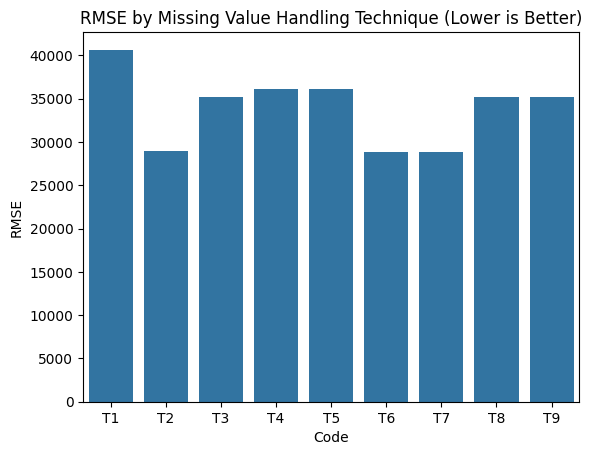

In [23]:
sns.barplot(data=results_df, x="Code", y="RMSE")
plt.title("RMSE by Missing Value Handling Technique (Lower is Better)")
plt.show()

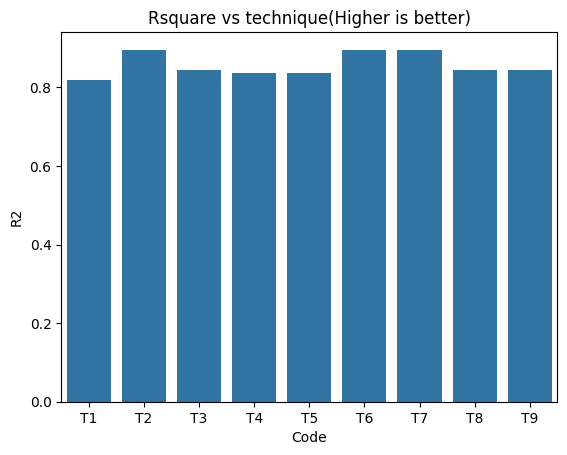

In [24]:
sns.barplot(data=results_df, x="Code", y="R2")
plt.title("Rsquare vs technique(Higher is better)")
plt.show()